In this regression task we will predict the percentage of marks that a student is expected to score based
upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables

#Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Impoting the data

In [2]:
url="http://bit.ly/w-data"
raw=pd.read_csv(url)
print("data imported successfully")
raw.head(15)

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
raw.shape

(25, 2)

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
raw.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
x=raw.Hours
y=raw.Scores

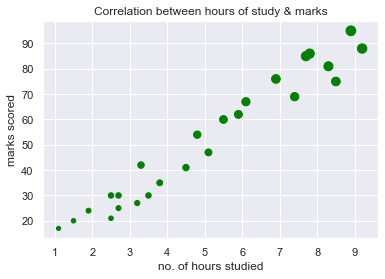

In [7]:
plt.title("Correlation between hours of study & marks")
plt.xlabel("no. of hours studied")
plt.ylabel("marks scored")
plt.scatter(x,y,s=raw["Scores"],c="green")
plt.show()

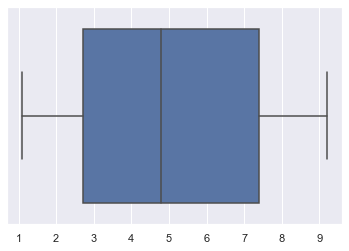

In [8]:
sns.boxplot([x])
plt.show()

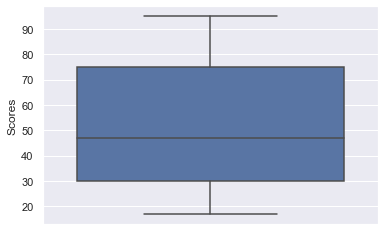

In [9]:
sns.boxplot(y,orient="vertical")
plt.show()

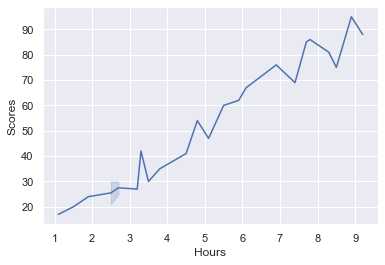

In [10]:
sns.lineplot(x,y)
plt.show()

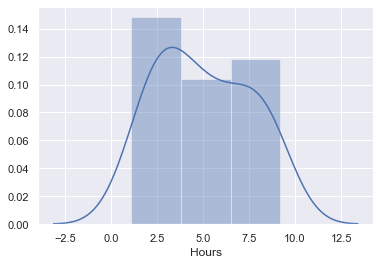

In [11]:
sns.distplot(x)
plt.show()

#Preparing the data

In [12]:
X=raw.iloc[:,:-1].values
Y=raw.iloc[:,1].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)
(20, 1)
(5, 1)


#Training the Algorithm

In [13]:
from sklearn.linear_model import LinearRegression
task=LinearRegression()
task.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Plotting the regression line

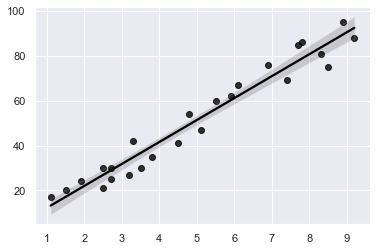

In [14]:
sns.regplot(X,Y,color='black')
plt.show()

#Making Predictions

In [15]:
print(X_test)
y_pred=task.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#Comparing Actual vs Predicted

In [16]:
raw=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})
raw

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Test with your own data

In [17]:
hour=9.25
own_pred=task.predict([[hour]])
print("No. of Hours ={}".format(hour))
print("predicted score={}".format(own_pred))

No. of Hours =9.25
predicted score=[93.69173249]


#Evaluating the Model

In [18]:
from sklearn import metrics
print('Mean Absolute Error :',metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Square Error :',metrics.mean_squared_error(Y_test,y_pred))

Mean Absolute Error : 4.183859899002982
Mean Square Error : 21.598769307217456
